In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import pdb
import pandas as pd
import numpy as np
import random

from scipy.interpolate import CubicSpline   

import numpy as np

In [2]:
## https://github.com/terryum/Data-Augmentation-For-Wearable-Sensor-Data/blob/master/Example_DataAugmentation_TimeseriesData.ipynb

In [3]:
data = np.load('X_sample.npy')

In [4]:
data.shape

(3600, 3)

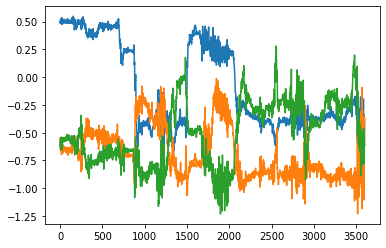

In [5]:
plt.plot(data[:, 0])
plt.plot(data[:, 1])
plt.plot(data[:, 2])

### Exercise: first useful augmentation strategy = adding jitter

In [6]:
def add_jitter(X, sigma=0.01):
    return X + np.random.normal(scale=sigma, size=X.shape)

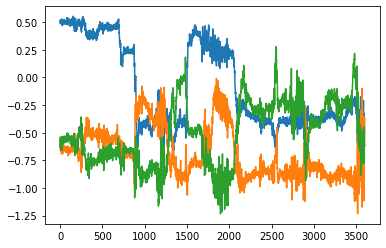

In [7]:
plt.plot(add_jitter(data))

### Another useful feature is zooming in or out, aka time warping

In [8]:
def WarpingCurve(X, sigma=0.1, freq = 2):
    return np.sin(np.linspace(0, 2 * np.pi, num = X.shape[0]) * freq) * sigma + 1

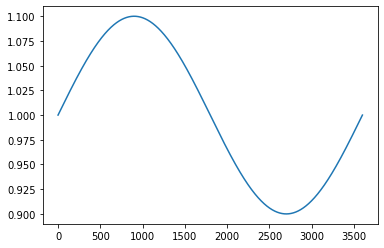

In [9]:
wc = WarpingCurve(data, freq = 1)
plt.plot(wc)

In [10]:
def DistortTimesteps(X, sigma=0.2):    
    wc = WarpingCurve(X, sigma) # Regard these samples aroun 1 as time intervals
    wc_cum = np.cumsum(wc, axis=0)        # Add intervals to make a cumulative graph
    return wc_cum

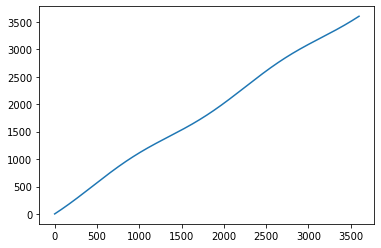

In [11]:
ts = DistortTimesteps(data)
plt.plot(ts)

## Exercise: now that I have these distorted, index like values, how can I use them to modify the original time series?

In [12]:
def TimeWarp(X, sigma=0.2):
    interp_data_idx = DistortTimesteps(X, sigma)
    X_interp = np.zeros(X.shape)
    full_idx = np.arange(X.shape[0])
    for i in range(X_interp.shape[1]):
        X_interp[:,i] = np.interp(full_idx, interp_data_idx, X[:,i])
    return X_interp

In [13]:
data_warped = TimeWarp(data)

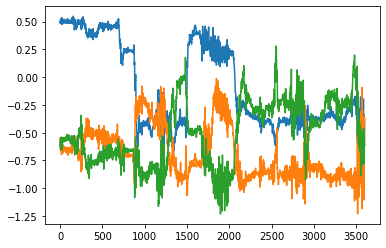

In [14]:
plt.plot(data)

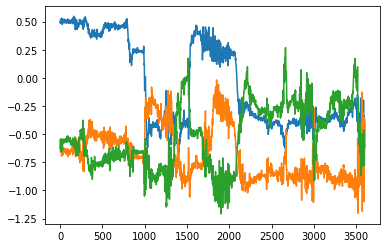

In [15]:
plt.plot(data_warped)

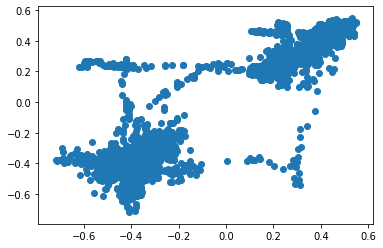

In [16]:
plt.scatter(data[:, 0], data_warped[:, 0])

### Exercise: another useful feature was permuting chunks of the time series. That is, cut the time series into different portions and reorder them. You will preserve most of the features will creating new data.